<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/0516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
model = keras.applications.resnet50.ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 0s 0us/step


In [3]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

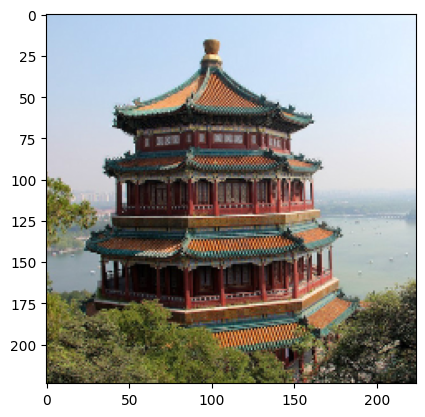

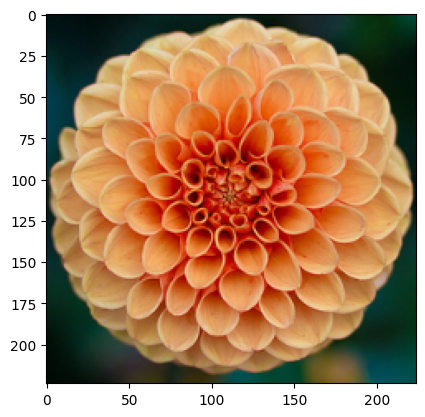

In [5]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plt.imshow(images_resized[0])
plt.show()
plt.imshow(images_resized[1])
plt.show()

In [6]:
inputs = keras.applications.resnet50.preprocess_input(images_resized*255)
y_prob = model.predict(inputs)

1/1 [==============================] - 2s 2s/step


In [7]:
y_prob.shape

(2, 1000)

In [2]:
print("2110147 우정은")

2110147 우정은


In [8]:
top_K = keras.applications.resnet50.decode_predictions(y_prob, top=3)
for image_index in range(len(images)):
    print("이미지 #{}".format(image_index))
    for class_id, name, y_prob in top_K[image_index]:
      print(" {}-{:12s}{:.2f}%".format(class_id, name, y_prob*100))
    print()

35363/35363 [==============================] - 0s 0us/step
이미지 #0
 n03877845-palace      43.39%
 n02825657-bell_cote   43.07%
 n03781244-monastery   11.70%

이미지 #1
 n04522168-vase        53.96%
 n07930864-cup         9.52%
 n11939491-daisy       4.97%



In [13]:
import torch
import numpy as np

x = torch.empty(5,4)
print(x)

tensor([[ 3.6280e-34,  0.0000e+00,  6.1192e-34,  0.0000e+00],
        [ 8.9683e-44,  0.0000e+00,  1.1210e-43,  0.0000e+00],
        [ 3.6283e-34,  0.0000e+00,  6.1186e-34,  0.0000e+00],
        [ 7.2889e+31,  5.0778e+31,  1.1210e-44,  0.0000e+00],
        [ 3.7780e+22,  2.1715e-18, -5.2359e-24,  4.5779e-41]])


In [14]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [15]:
torch.zeros(2)

tensor([0., 0.])

In [16]:
torch.rand(5,6)

tensor([[0.4742, 0.2645, 0.1926, 0.8617, 0.6830, 0.6232],
        [0.0097, 0.1739, 0.8430, 0.7301, 0.2527, 0.5614],
        [0.4608, 0.9227, 0.1471, 0.1466, 0.1339, 0.2586],
        [0.1946, 0.3061, 0.1105, 0.3498, 0.6969, 0.0373],
        [0.8221, 0.1664, 0.9789, 0.1982, 0.9832, 0.3273]])

In [17]:
I=[13, 4]
r = np.array([4,56,7])
torch.tensor(I)

tensor([13,  4])

In [18]:
torch.tensor(r)

tensor([ 4, 56,  7])

In [19]:
x.size()[1]

4

In [20]:
type(x)

torch.Tensor

In [21]:
x = torch.rand(2,2)
y= torch.rand(2,2)
x+y

tensor([[1.7601, 1.1759],
        [1.1432, 0.2802]])

In [22]:
torch.add(x,y)

tensor([[1.7601, 1.1759],
        [1.1432, 0.2802]])

In [23]:
y.add(x)

tensor([[1.7601, 1.1759],
        [1.1432, 0.2802]])

In [24]:
y.add_(x)

tensor([[1.7601, 1.1759],
        [1.1432, 0.2802]])

In [25]:
x = torch.rand(8,8)
print(x.size())

torch.Size([8, 8])


In [26]:
a = x.view(64)
print(a.size())

torch.Size([64])


In [27]:
b=x.view(-1,4,4)
print(b.size())

torch.Size([4, 4, 4])


In [28]:
x = torch.rand(8, 8)
y = x.numpy()
type(y)

numpy.ndarray

In [29]:
x = torch.ones(1)
print(x.item())

1.0


In [30]:
import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

In [31]:
train_dataset = torchvision.datasets.FashionMNIST('./data', download = True,
                                                  train=True, transform=tr.Compose([tr.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST('./data', download = True,
                                                  train=False, transform=tr.Compose([tr.ToTensor()]))

100%|██████████| 26421880/26421880 [00:01<00:00, 15719159.80it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270098.12it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5044320.91it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17357135.85it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [32]:
train_loader = DataLoader(train_dataset, batch_size=100)
test_loader = DataLoader(test_dataset, batch_size=100)

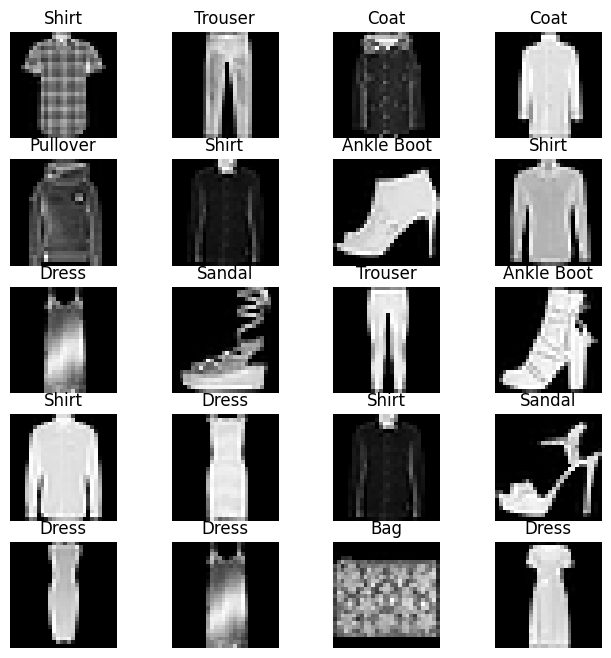

In [33]:
classes = {0: 'T-Shirts', 1: 'Trouser', 2: 'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}
images, labels = next(iter(train_loader))

fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows+1):
  img_xy = np.random.randint(len(images))
  img = images[img_xy][0,:,:]
  fig.add_subplot(rows, columns, i)
  plt.title(classes[labels[img_xy].item()])
  plt.axis('off')
  plt.imshow(img,cmap='gray')
plt.show()

In [38]:
transf = tr.Compose([tr.Resize(16), tr.ToTensor()])

In [39]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

Files already downloaded and verified
Files already downloaded and verified


In [40]:
trainloader = DataLoader(trainset, batch_size=50)
testloader = DataLoader(testset, batch_size=50)

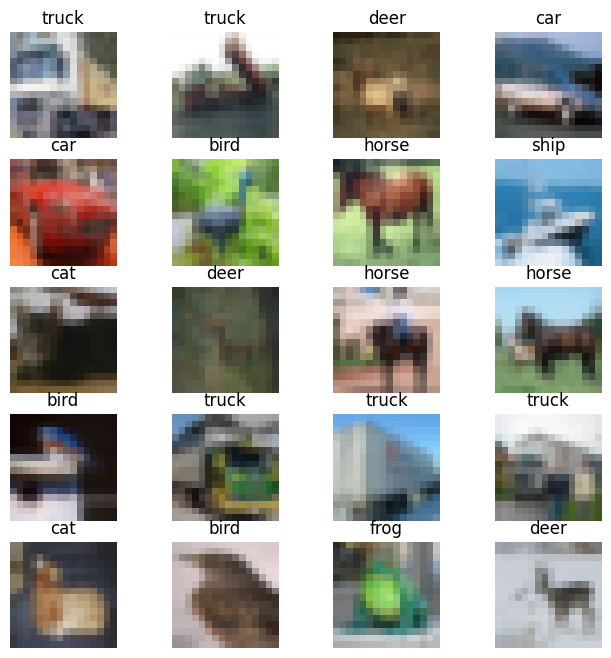

In [41]:
classes = {0: 'plane', 1: 'car', 2: 'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
images, labels = next(iter(trainloader))

fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows+1):
  img = images[i].permute(1,2,0).numpy()
  fig.add_subplot(rows, columns, i)
  plt.title(classes[labels[i].item()])
  plt.axis('off')
  plt.imshow(img)
plt.show()